In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [73]:
df = pd.read_csv('dataset_alda.csv')
df = df.drop(columns = ['occupancy','url'])

In [74]:
df.shape

(574, 7)

In [75]:
df.head()

,Unnamed: 0,rooms,prices_list,stars_list,number_of_reviews_list,beds,bath
0,1,1.0,189.0,5.00,48,4,4
1,2,1.0,85.0,4.94,311,2,2
2,3,1.0,159.0,5.00,6,2,2
3,4,1.0,276.0,4.93,333,2,2
4,5,1.0,98.0,4.94,36,2,2


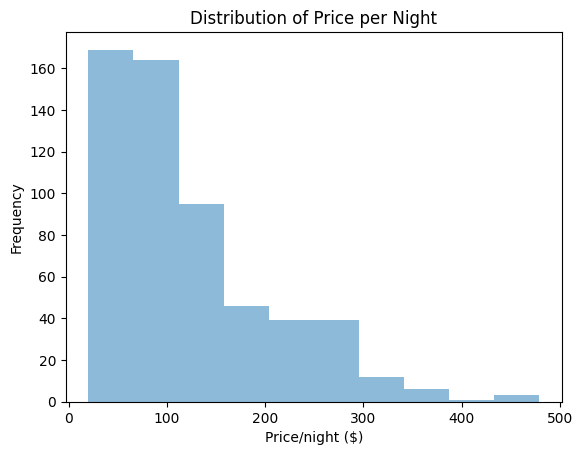

<Figure size 800x600 with 0 Axes>

In [76]:
df['prices_list'].plot.hist(alpha=0.5)
title = plt.title("Distribution of Price per Night")
plt.xlabel('Price/night ($)')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Price/night ($)')

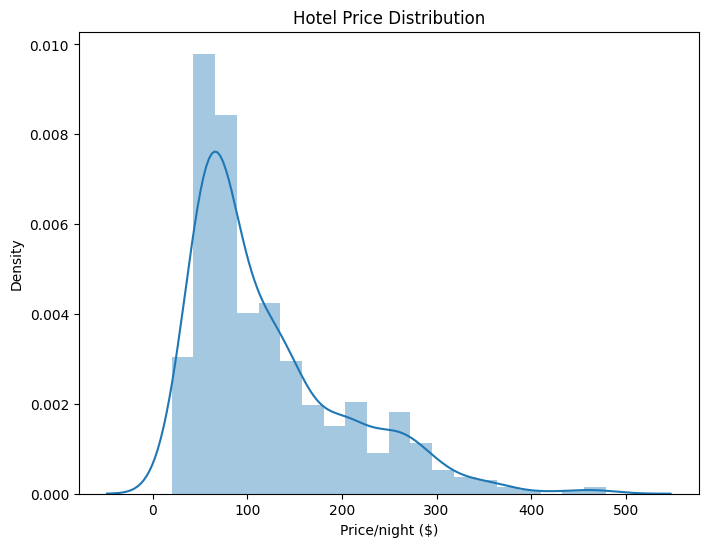

In [77]:
plt.figure(figsize=(8,6))
sns.distplot(df['prices_list'])
title = plt.title("Hotel Price Distribution")
plt.xlabel('Price/night ($)')

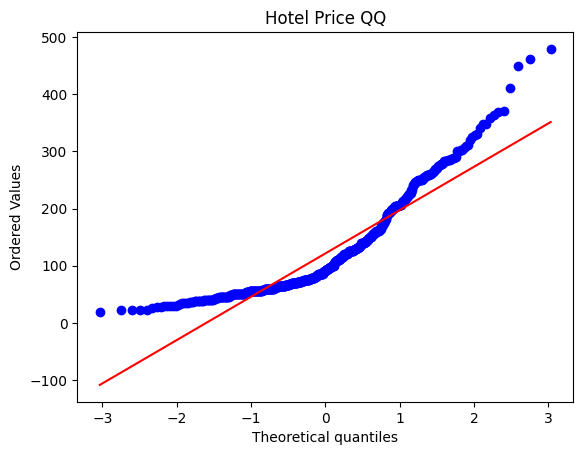

In [78]:
price_d = stats.probplot(df['prices_list'], plot=plt)
title = plt.title("Hotel Price QQ")

In [79]:
# plt.figure(figsize=(8,6))
# sns.boxplot(df['prices_list'])
# title = plt.title("Hotel Price Boxplot")
# plt.xlabel('Price/night ($)')

In [80]:
#skewness and kurtosis
print("Skewness: %f" % df['prices_list'].skew())
print("Kurtosis: %f" % df['prices_list'].kurt())

Skewness: 1.347683
Kurtosis: 1.602232


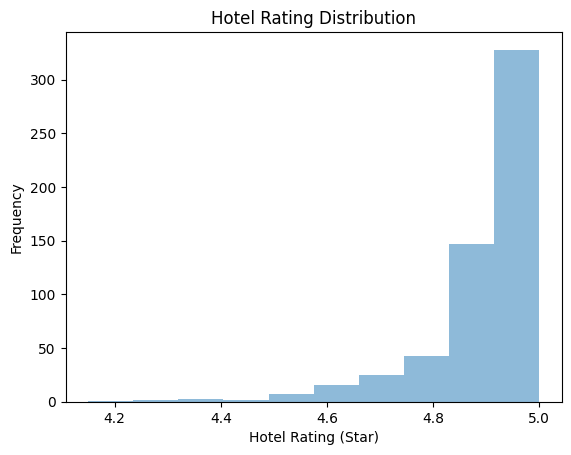

<Figure size 800x600 with 0 Axes>

In [81]:
df['stars_list'].plot.hist(alpha=0.5)
plt.title ('Hotel Rating Distribution')
plt.xlabel('Hotel Rating (Star)')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

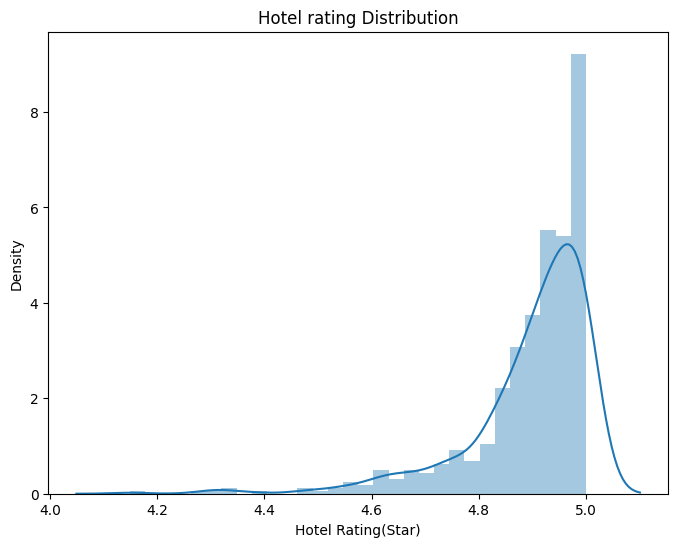

In [82]:
plt.figure(figsize=(8,6))
sns.distplot(df['stars_list'])
plt.xlabel('Hotel Rating(Star)')
title = plt.title("Hotel rating Distribution")

Text(0.5, 1.0, 'Hotel Star QQ')

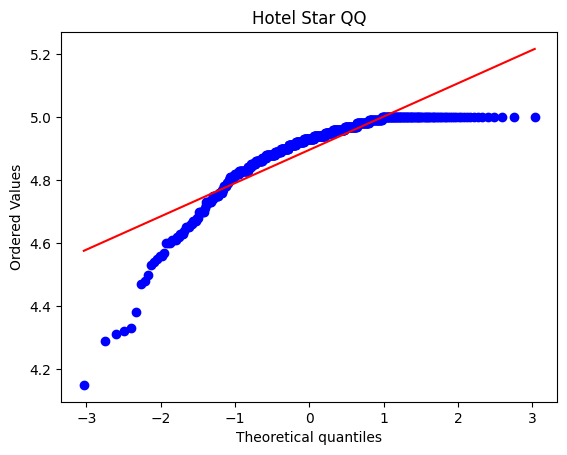

In [83]:
stats.probplot(df['stars_list'], plot=plt)
plt.title("Hotel Star QQ")

Text(0.5, 0, 'Hotel Rating(Star)')

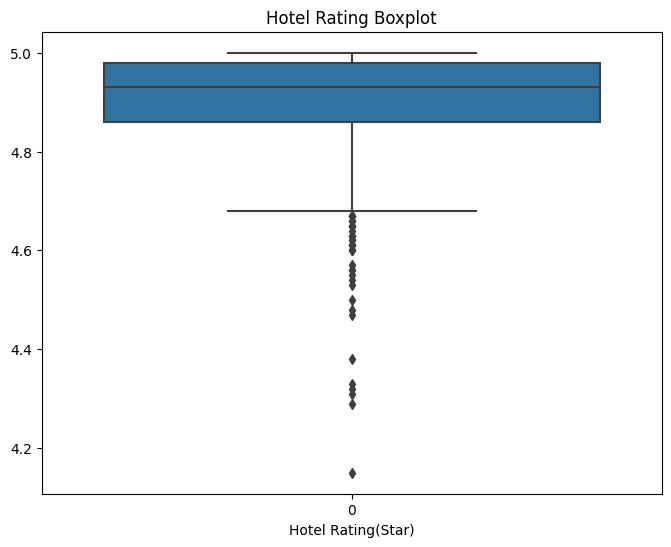

In [84]:
plt.figure(figsize=(8,6))
sns.boxplot(df['stars_list'])
title = plt.title("Hotel Rating Boxplot")
plt.xlabel('Hotel Rating(Star)')

In [85]:
#skewness and kurtosis
print("Skewness: %f" % df['stars_list'].skew())
print("Kurtosis: %f" % df['stars_list'].kurt())

Skewness: -2.268606
Kurtosis: 7.084905


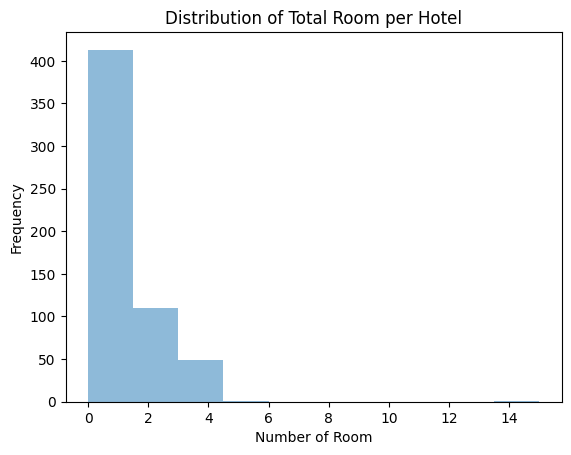

<Figure size 800x600 with 0 Axes>

In [86]:
df['rooms'].plot.hist(alpha=0.5)
title = plt.title("Distribution of Total Room per Hotel")
plt.xlabel('Number of Room')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Number of Room')

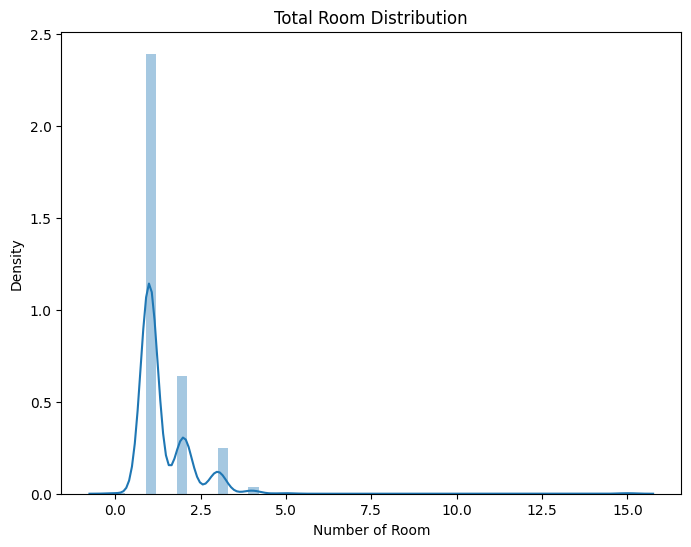

In [87]:
plt.figure(figsize=(8,6))
sns.distplot(df['rooms'])
title = plt.title("Total Room Distribution")
plt.xlabel('Number of Room')

Text(0.5, 1.0, 'Total Room QQ')

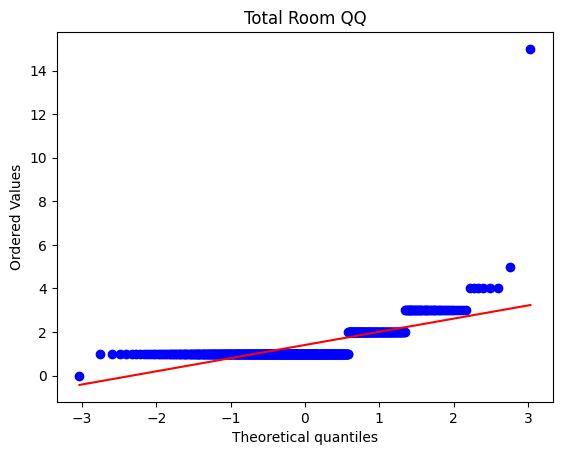

In [88]:
stats.probplot(df['rooms'], plot=plt)
plt.title("Total Room QQ")

Text(0.5, 0, 'Number of Room')

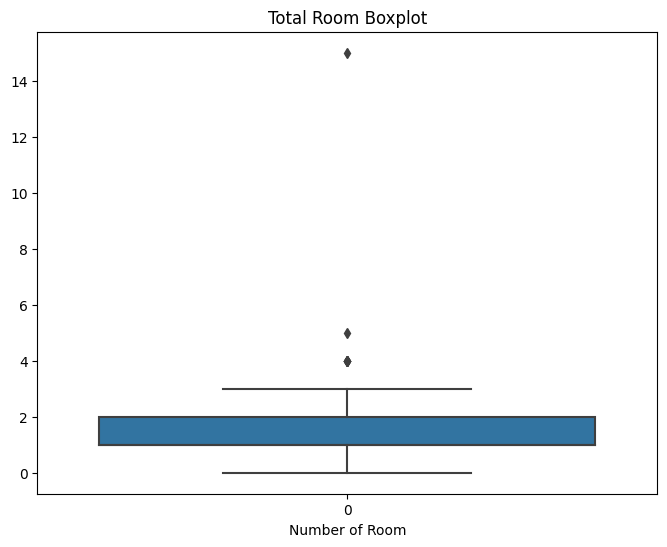

In [89]:
plt.figure(figsize=(8,6))
sns.boxplot(df['rooms'])
title = plt.title("Total Room Boxplot")
plt.xlabel('Number of Room')

In [90]:
#skewness and kurtosis
print("Skewness: %f" % df['rooms'].skew())
print("Kurtosis: %f" % df['rooms'].kurt())

Skewness: 6.992747
Kurtosis: 94.251142


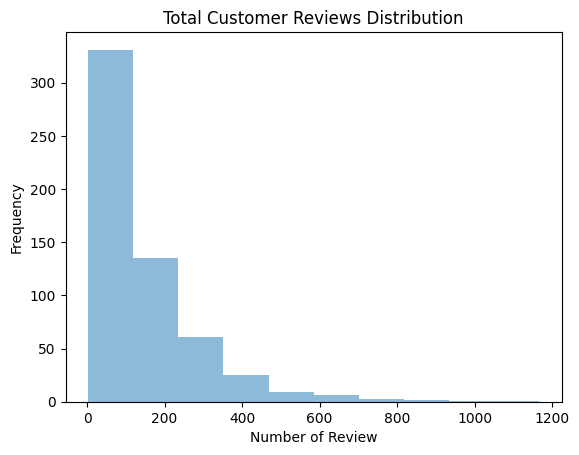

<Figure size 800x600 with 0 Axes>

In [91]:
df['number_of_reviews_list'].plot.hist(alpha=0.5)
plt.title("Total Customer Reviews Distribution")
plt.xlabel('Number of Review')
plt.ylabel('Frequency')
plt.figure(figsize=(8,6))
plt.show()

Text(0.5, 0, 'Number of Review')

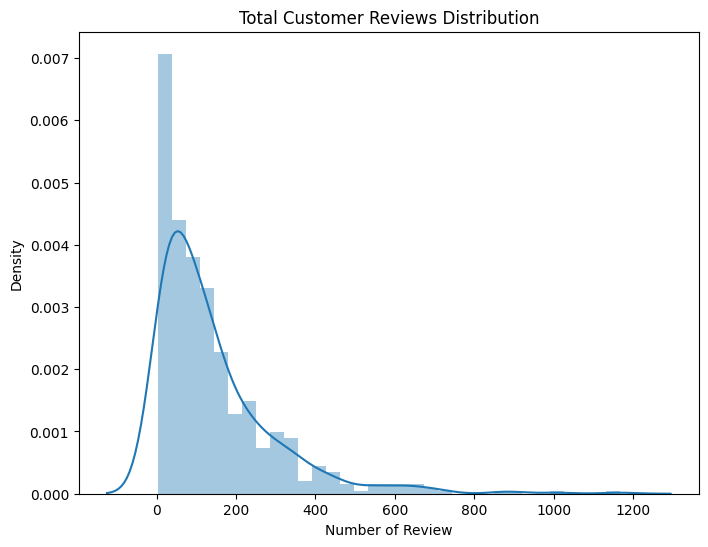

In [92]:
plt.figure(figsize=(8,6))
sns.distplot(df['number_of_reviews_list'])
title = plt.title("Total Customer Reviews Distribution")
plt.xlabel("Number of Review")

Text(0.5, 1.0, 'Total Review QQ')

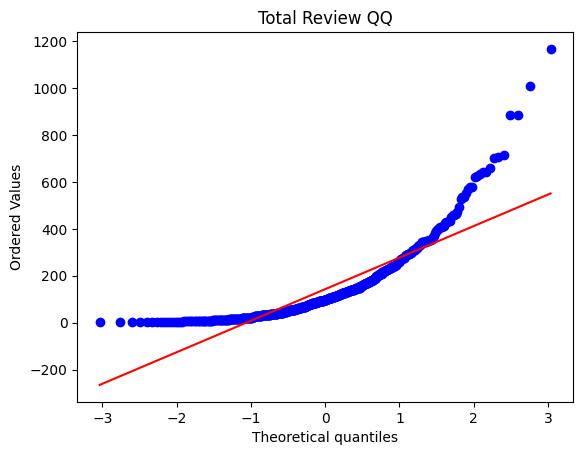

In [93]:
stats.probplot(df['number_of_reviews_list'], plot=plt)
plt.title("Total Review QQ")

Text(0.5, 0, 'Number of Review')

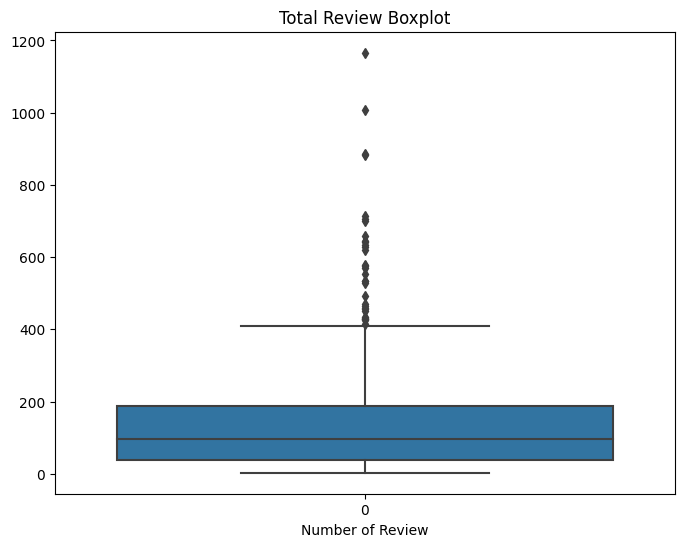

In [94]:
plt.figure(figsize=(8,6))
sns.boxplot(df['number_of_reviews_list'])
title = plt.title("Total Review Boxplot")
plt.xlabel('Number of Review')

In [95]:

#skewness and kurtosis
print("Skewness: %f" % df['number_of_reviews_list'].skew())
print("Kurtosis: %f" % df['number_of_reviews_list'].kurt())

Skewness: 2.347481
Kurtosis: 8.057583


Text(0, 0.5, 'Price/night($)')

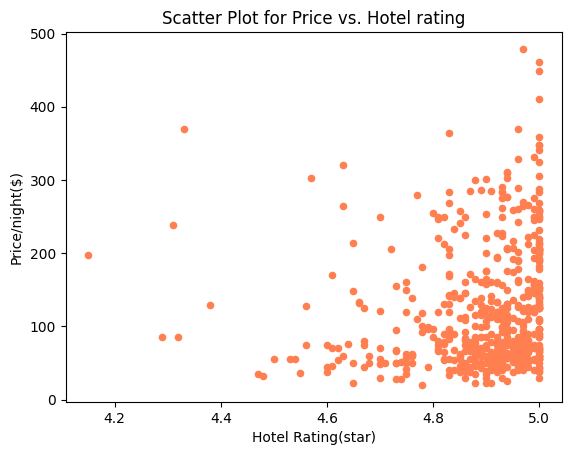

In [96]:
df.plot.scatter(x='stars_list',y='prices_list',c='coral')
title = plt.title('Scatter Plot for Price vs. Hotel rating')
plt.xlabel('Hotel Rating(star)')
plt.ylabel('Price/night($)')

In [97]:
## Spliting data

In [102]:
from sklearn.model_selection import train_test_split
df.drop(['Unnamed: 0'], axis=1,inplace=True)
df_train, df_test = train_test_split(df, test_size=0.2)

In [103]:
print(len(df_train))
print(len(df_test))

459
115


In [104]:
df_train =df_train[~df_train.isin([np.nan, np.inf, -np.inf]).any(1)]
df_test =df_test[~df_test.isin([np.nan, np.inf, -np.inf]).any(1)]

X_train = df_train[['stars_list','rooms','number_of_reviews_list']]
y_train = df_train['prices_list']

X_test = df_test[['stars_list','rooms','number_of_reviews_list']]
y_test = df_test['prices_list']

In [105]:
#correlation matrix
corrmat = df_train.corr()
corrmat

,rooms,prices_list,stars_list,number_of_reviews_list,beds,bath
rooms,1.000000,0.323628,-0.103963,-0.045740,0.672244,0.672244
prices_list,0.323628,1.000000,0.141034,-0.186215,0.375719,0.375719
stars_list,-0.103963,0.141034,1.000000,-0.031977,-0.077197,-0.077197
number_of_reviews_list,-0.045740,-0.186215,-0.031977,1.000000,-0.017936,-0.017936
beds,0.672244,0.375719,-0.077197,-0.017936,1.000000,1.000000
bath,0.672244,0.375719,-0.077197,-0.017936,1.000000,1.000000


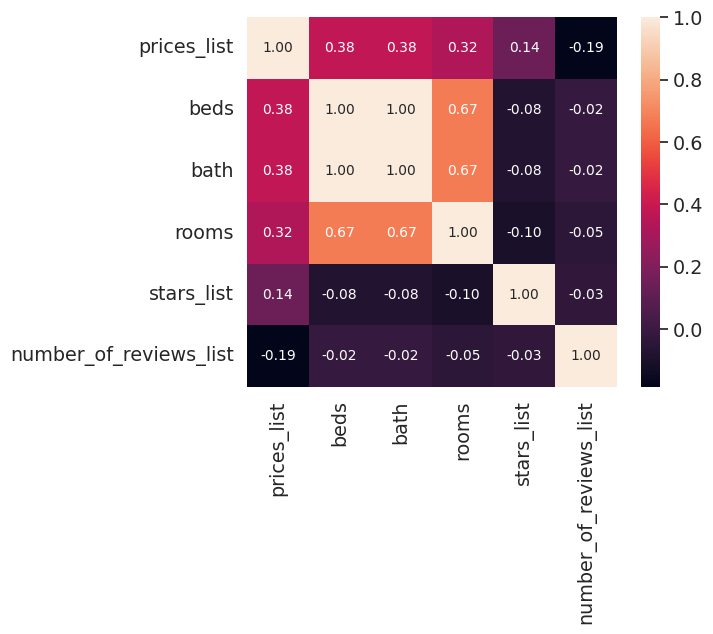

In [106]:
#price correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'prices_list')['prices_list'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

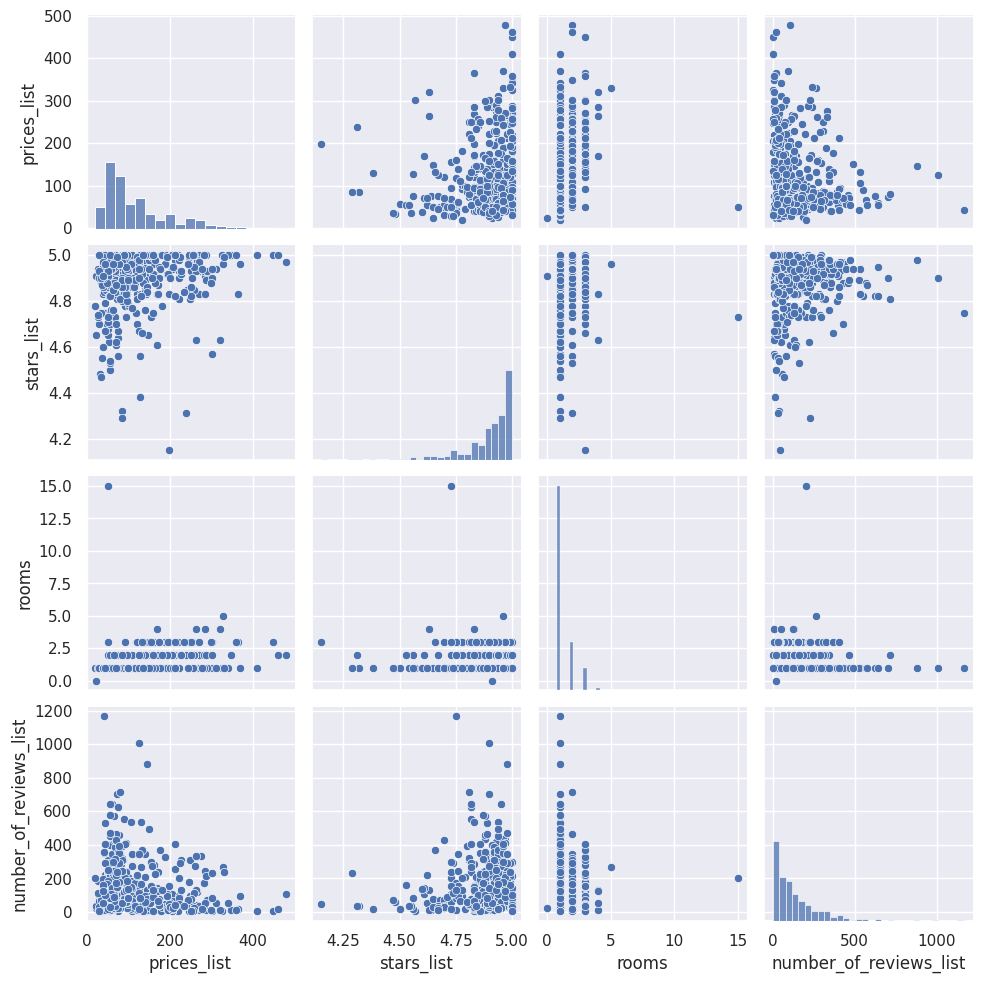

In [107]:
#scatterplot
sns.set()
cols = ['prices_list', 'stars_list', 'rooms','number_of_reviews_list']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

In [108]:
## Data Transformation

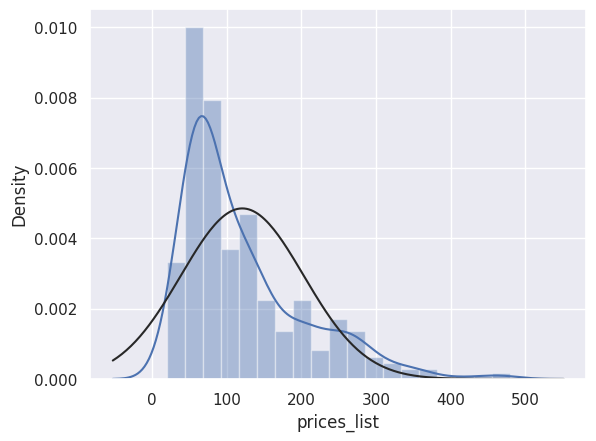

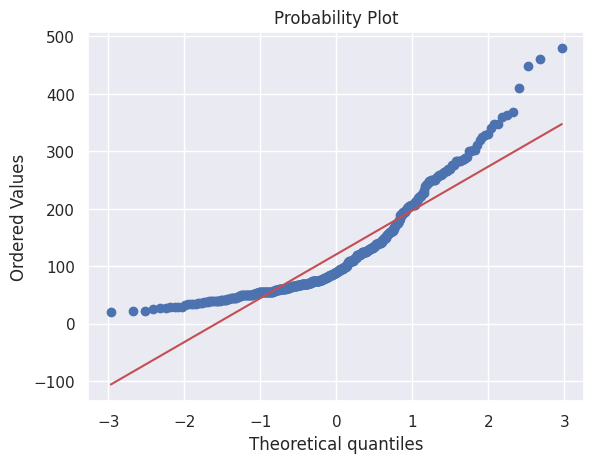

In [109]:
#histogram and normal probability plot
sns.distplot(df_train['prices_list'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['prices_list'], plot=plt)

In [110]:
#applying log transformation
df_train['prices_list'] = np.log(df_train['prices_list'])

In [112]:
#skewness and kurtosis
print("Skewness: %f" % df_train['prices_list'].skew())
print("Kurtosis: %f" % df_train['prices_list'].kurt())

Skewness: 0.234452
Kurtosis: -0.642945


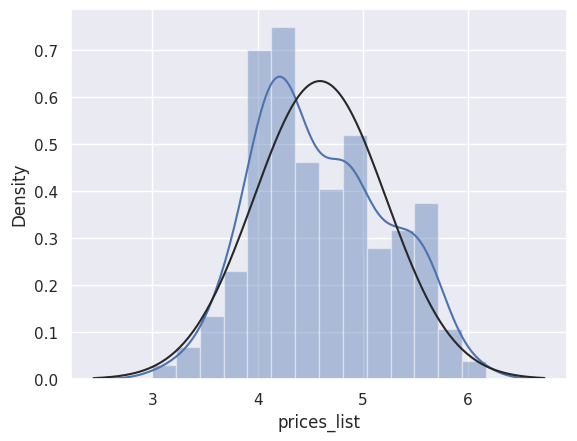

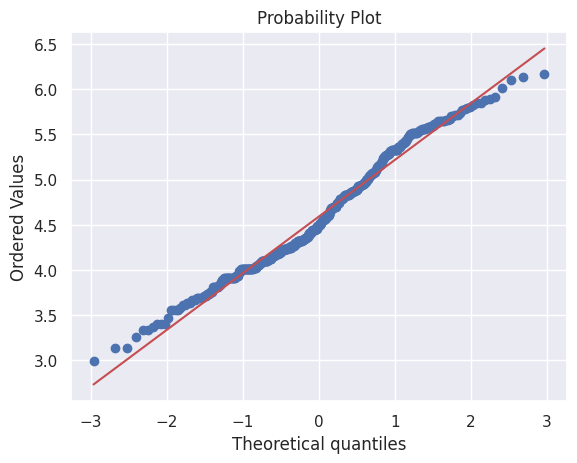

In [113]:
#transformed histogram and normal probability plot
sns.distplot(df_train['prices_list'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['prices_list'], plot=plt)

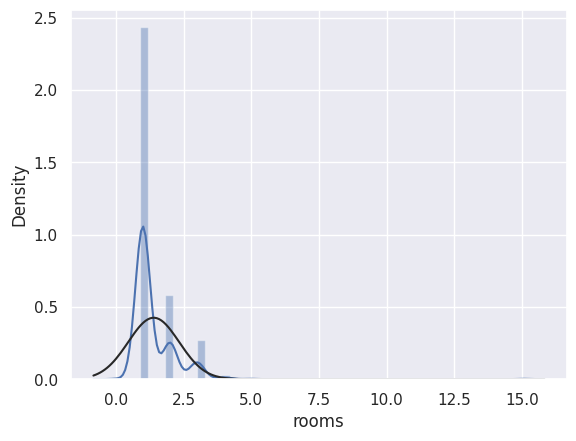

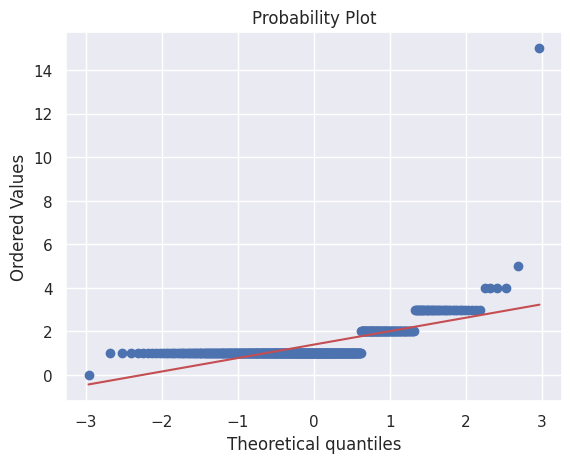

In [114]:
#histogram and normal probability plot
sns.distplot(df_train['rooms'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['rooms'], plot=plt)

In [115]:
#skewness and kurtosis
print("Skewness: %f" % df['rooms'].skew())
print("Kurtosis: %f" % df['rooms'].kurt())

Skewness: 6.992747
Kurtosis: 94.251142
